In [1]:
import os
import sys
nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)

from LSTM_for_Stock.data_processor import DataLoader
from LSTM_for_Stock.model import Model
from LSTM_for_Stock import unit
import pandas as pd

Using TensorFlow backend.


In [2]:
def do(code, benchmark='399300', window=10, days=5, norm=True, split=0.15):
    dataloader = DataLoader(code, benchmark)
    model = Model()
    comp = {"optimizer": "adam",
            "loss": "mse",
            "metrics": [
                "mae",
                "acc"
            ]}
    layers = [{'units': 200, 'type': 'lstm'},
              {'units': 1, 'type': 'dense'}]
    train = {'epochs': 50, 'verbose': 2,
             'validation_split': split, 'batch_size': 128}

    model.build_model(layers, comp)
    X_tra, Y_tra = dataloader.get_train_data(window, days, norm)
    Y_tra_slope = unit.calc_slope(Y_tra)
    history = model.train(X_tra, Y_tra_slope, train)
    unit.plot_history(history)

    X_val, Y_val = dataloader.get_valid_data(window, days, norm)
    Y_val_slope = unit.calc_slope(Y_val)
    print(model.evaluate(X_val, Y_val_slope, {'batch_size': 128}))
    pred_slope = model.predict(X_val, {'batch_size': 128})
    dd = DataLoader(code, benchmark, split=0,
                    start=dataloader._df_valid.index[0].strftime('%Y-%m-%d'), online=True)
    dd_X = dd.get_train_data(window, days, norm)[0][:, 0, 0]
    # 验证集误差计算
    unit.plot_result_by_slope(dd_X, pred_slope, window, days).show()

Train on 2252 samples, validate on 398 samples
Epoch 1/50
 - 1s - loss: 0.0017 - mean_absolute_error: 0.0342 - acc: 0.0275 - val_loss: 5.0953e-04 - val_mean_absolute_error: 0.0225 - val_acc: 0.0578
Epoch 2/50
 - 1s - loss: 1.6068e-04 - mean_absolute_error: 0.0111 - acc: 0.0275 - val_loss: 6.2691e-06 - val_mean_absolute_error: 0.0021 - val_acc: 0.0578
Epoch 3/50
 - 1s - loss: 3.0092e-05 - mean_absolute_error: 0.0046 - acc: 0.0275 - val_loss: 2.1659e-05 - val_mean_absolute_error: 0.0044 - val_acc: 0.0578
Epoch 4/50
 - 1s - loss: 1.0229e-05 - mean_absolute_error: 0.0025 - acc: 0.0275 - val_loss: 2.6482e-06 - val_mean_absolute_error: 0.0012 - val_acc: 0.0578
Epoch 5/50
 - 1s - loss: 5.8305e-06 - mean_absolute_error: 0.0018 - acc: 0.0275 - val_loss: 2.0095e-06 - val_mean_absolute_error: 0.0011 - val_acc: 0.0578
Epoch 6/50
 - 1s - loss: 4.5530e-06 - mean_absolute_error: 0.0015 - acc: 0.0275 - val_loss: 1.7337e-06 - val_mean_absolute_error: 0.0010 - val_acc: 0.0578
Epoch 7/50
 - 1s - loss: 4.

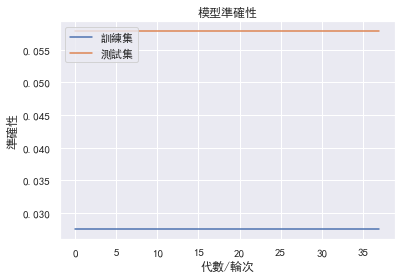

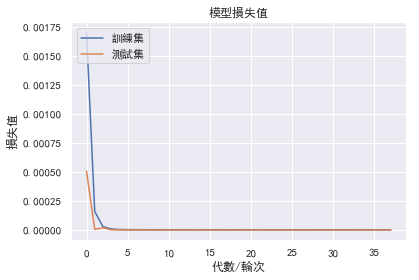

281/281 [==============================] - ETA:  - 0s 82us/step
[3.114359171678153e-06, 0.0012508224736521305, 0.039145907234678916]


QUANTAXIS>> Selecting the Best Server IP of TDX


BAD RESPONSE 180.153.18.170
DEFAULT STOCK IP is BAD, RETESTING
BAD RESPONSE 61.152.107.168
BAD RESPONSE 113.05.73.88
BAD RESPONSE 121.14.110.194
BAD RESPONSE 119.147.171.206
BAD RESPONSE 121.14.2.7
BAD RESPONSE 60.28.29.69
BAD RESPONSE 180.153.18.17
BAD RESPONSE 59.173.18.69
BAD RESPONSE 61.153.144.179
BAD RESPONSE 119.29.51.30
BAD RESPONSE 121.14.104.70
BAD RESPONSE 121.14.104.72
BAD RESPONSE 114.80.149.84
️Bad FUTUREIP REPSONSE 124.74.236.94
DEFAULT FUTURE IP is BAD, RETESTING
️Bad FUTUREIP REPSONSE 124.74.236.94
️Bad FUTUREIP REPSONSE 112.74.214.43
️Bad FUTUREIP REPSONSE 120.24.0.77
️Bad FUTUREIP REPSONSE 106.14.95.149
️Bad FUTUREIP REPSONSE 119.97.185.5
️Bad FUTUREIP REPSONSE 202.103.36.71
️Bad FUTUREIP REPSONSE 59.175.238.38
BAD RESPONSE 113.105.142.136
BAD RESPONSE 61.152.107.141
BAD RESPONSE 61.152.107.171
BAD RESPONSE 119.147.86.171
️Bad FUTUREIP REPSONSE 47.92.127.181


QUANTAXIS>> === The BEST SERVER ===
 stock_ip 180.153.39.51 future_ip 124.74.236.94


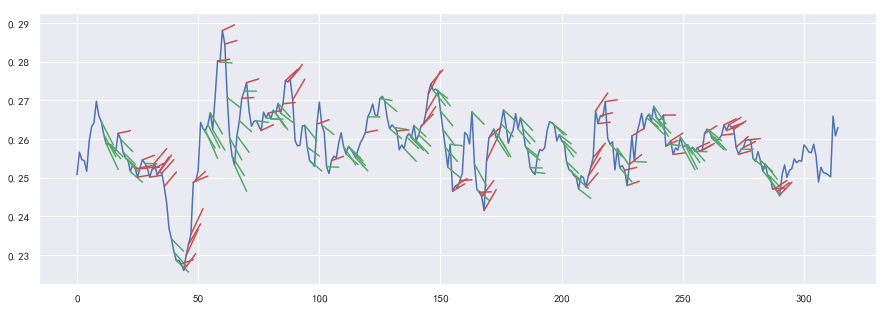

In [3]:
do('601398')